## Students Performance in Exams
### 사용 데이터
- [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- Data Description
  - gender
  - race/ethnicity
  - parental level of education
  - lunch
  - test preparation course
  - math score
  - reading score
  - writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

raw_data = pd.read_csv("./StudentsPerformance.csv")
data = raw_data.copy()
print(data.shape)

(1000, 8)


In [2]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [3]:
data.duplicated().sum()

0

In [4]:
# data.sample(10)
data.sample(frac=0.01)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
690,female,group C,associate's degree,standard,none,49,53,53
675,female,group B,some college,standard,completed,50,64,66
286,male,group E,associate's degree,standard,completed,97,82,88
239,male,group C,associate's degree,standard,none,84,80,80
424,male,group B,some college,free/reduced,none,41,39,34
909,male,group E,bachelor's degree,standard,completed,70,64,70
486,male,group D,some college,free/reduced,none,61,47,56
148,female,group D,bachelor's degree,standard,completed,68,75,81
613,female,group C,associate's degree,standard,none,65,77,74
680,female,group D,high school,standard,none,67,72,74


In [5]:
# data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
for i in range(data.shape[1]):
  print(f'{data.columns[i]}: {data.loc[:,data.columns[i]].unique()}')

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']
math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score: [ 74  88  93  44  75 

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<AxesSubplot:>

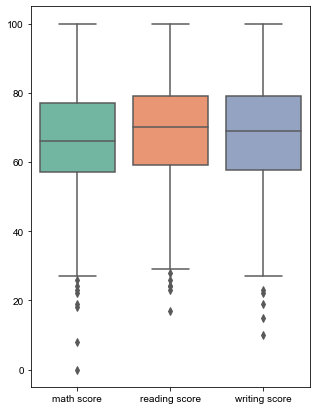

In [8]:
fig, ax = plt.subplots(figsize = (5,7))
sns.set_theme(style="whitegrid")
sns.boxplot(data=data, orient="y", palette="Set2")

In [9]:
q3 = data.quantile(0.75)
q1 = data.quantile(0.25)

iqr = q3 - q1
iqr

math score       20.00
reading score    20.00
writing score    21.25
dtype: float64

In [10]:
def is_outlier(column_name):
  iqr_range = 1.5
  outlier_detection = lambda x: True if x > q3[column_name] + iqr_range*iqr[column_name] or \
    x < q1[column_name] - iqr_range*iqr[column_name] else False
  return data[column_name].apply(outlier_detection)

math_check = is_outlier('math score')
reading_check = is_outlier('reading score')
writing_check = is_outlier('writing score')


In [11]:
total_check = np.concatenate([[math_check], [reading_check], [writing_check]], axis=0)
total_check = total_check.T
total_check.shape

(1000, 3)

In [12]:
data.loc[map(lambda x : True if x.any() else False, total_check)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
145,female,group C,some college,free/reduced,none,22,39,33
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
596,male,group B,high school,free/reduced,none,30,24,15
787,female,group B,some college,standard,none,19,38,32


In [16]:
data_trim = data.loc[map(lambda x : True if not x.any() else False, total_check)]
data_trim.reset_index(inplace=True)
data_trim

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
983,995,female,group E,master's degree,standard,completed,88,99,95
984,996,male,group C,high school,free/reduced,none,62,55,55
985,997,female,group C,high school,free/reduced,completed,59,71,65
986,998,female,group D,some college,standard,completed,68,78,77
